# Análisis de distribución de datos
### Gerald Joel Peña Mejía
En este análisis se busc explorar un conjunto de datos y determinar qué distribución modela más efectivamente cada columna. Se utiliza el dataset de Diamonds (https://ggplot2.tidyverse.org/reference/diamonds.html)

In [1]:
# Librerias usadas
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("Diamonds.csv") # importamos los datos con pandas
df # Desplegamos los datos para ver la tabla+

,carat,cut,color,clarity,depth,table,price,x,y,z,unknownCol
0,0.32,Premium,J,VS2,61.9,58.0,504,4.38,4.35,2.70,5.100000
1,1.50,Good,F,SI2,62.9,59.0,7727,7.19,7.32,4.56,4.900000
2,0.38,Ideal,H,VS1,61.7,55.0,955,4.65,4.70,2.89,4.700000
3,0.53,Ideal,F,VVS1,62.1,53.2,2273,5.17,5.21,3.22,4.600000
4,0.55,Ideal,D,VS2,60.6,56.0,2224,5.30,5.36,3.23,5.000000
...,...,...,...,...,...,...,...,...,...,...,...
195,1.12,Premium,G,SI1,60.1,58.0,5233,6.78,6.83,4.09,6.763648
196,0.37,Ideal,D,VVS2,61.6,54.0,997,4.61,4.64,2.85,6.381457
197,0.30,Very Good,D,VVS2,60.6,58.0,2366,4.33,4.35,2.63,5.112152
198,2.18,Premium,J,VS2,60.1,58.0,15465,8.46,8.41,5.07,6.108909


In [3]:
df.info() # Visualizamos el tipo de dato y nulos por columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       200 non-null    float64
 1   cut         200 non-null    object 
 2   color       200 non-null    object 
 3   clarity     200 non-null    object 
 4   depth       200 non-null    float64
 5   table       200 non-null    float64
 6   price       200 non-null    int64  
 7   x           200 non-null    float64
 8   y           200 non-null    float64
 9   z           200 non-null    float64
 10  unknownCol  200 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 17.3+ KB


In [4]:
data = df["carat"] # Escogemos la columna llamada carat, que contiene valores de peso y es de tipo float.
data

0      0.32
1      1.50
2      0.38
3      0.53
4      0.55
       ... 
195    1.12
196    0.37
197    0.30
198    2.18
199    0.32
Name: carat, Length: 200, dtype: float64

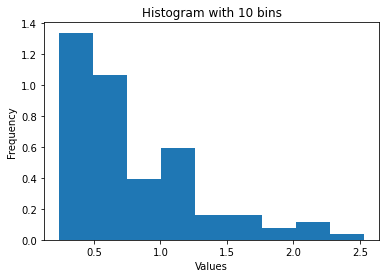

In [5]:
n, bins, patches = plt.hist(data, bins='sturges', density= True)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram with 10 bins")
plt.show()

# Utilizamos el método de Sturges para la cantidad de clases en el histograma
# Desplegamos el histograma

**Análisis:** Algunas apreciaciones de la forma que tiene el histograma son las siguientes:
- Tiene un forma de sesgo positivo.
- Parece tener forma de "j" invertida

Brindaremos al menos una propuesta de distribución candidata que modela esa columna, definiendo los parámetros de la distribución y una gráfica de la distribución paramétrica.

Tomando en cuenta el siguiente apoyo visual, el cuál nos explica de manera resumida que distribución tomar mediante algunas consideraciones, nos permitirá discriminar para obtener distribuciones canditadas para evaluar con nuestro histograma y datos:

![](https://relopezbriega.github.io/images/distributions_choice.png)

Algunas valoraciones del histograma con respecto al material visual anterior:
- El tipo de dato que contiene la columna "carat" es de valores de tipo peso, por lo que se considera datos de tipo continuos.
- El histograma muestra asimetria.
- Hay sesgo de datos positivos.

Tomando en cuenta los factores anteriores y basados en el material visual anterior de la **Figura 6A.15: Distributional Choises** podríamos considerar probar nuestros datos con las distribuciones: Lognormal, Gamma y Weibull. Además es posible que haya un buen ajuste con la distribución exponencial, por lo cual también será tomada en cuenta.

### Distribucicón GAMMA

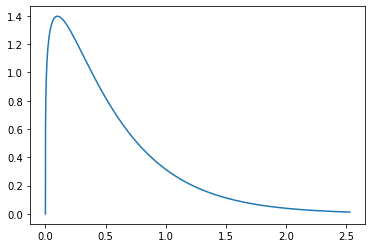

In [6]:
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt

#define x-axis values
x = np.linspace (0, max(data), 100000) 

forma, localiz, escala = gamma.fit(data)

#calculate pdf of Gamma distribution for each x-value
y = stats.gamma.pdf(x, a = forma, scale = escala)

#create plot of Gamma distribution
plt.plot(x, y)

#display plot
plt.show()

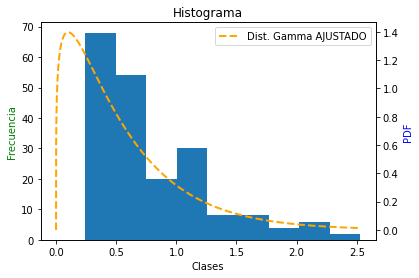

In [7]:
x = np.linspace (0, max(data), 100000) 
forma, localiz, escala = gamma.fit(data) # Se utiliza la función norm.fit() para encontrar la media y desv.estandar optimos por Maxima Verosimilitud y ajsutar el pdf.

#pdf_evaluado = norm.pdf(x_values, loc = u, scale = o)
y = stats.gamma.pdf(x, a = forma, scale = escala)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(data, bins = 'sturges', label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Gamma AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma")
ax2.legend(loc= 'upper right')
plt.show()

Ahora tomando en cuenta la prueba hipótesis resultado de la prueba Kolmogorov-Smirnov:

- Hipótesis nula $(H_0)$: los datos provienen de la distribución especificada.

- Hipótesis alternativa ($H_1$): al menos un valor no concuerda con la distribución especificada.

Se considera el siguiente resultado (así como para las demás distribuciones):

In [8]:
stats.kstest(data,'gamma', args=( forma, localiz, escala) )

KstestResult(statistic=0.07075540455684215, pvalue=0.2569970500827511)

Podemos observar que el valor de $p$ es mayor a 0.05, por lo que hay suficiente evidencia para rechazar $H_1$ y aceptar la $H_0$ que considera que los datos proveienen de la distribucion especificada.

Vamos a considerar realizar el mismo análisis para las distribuciones exponencial, lognormal y Weibull.

### Distribución Lognormal

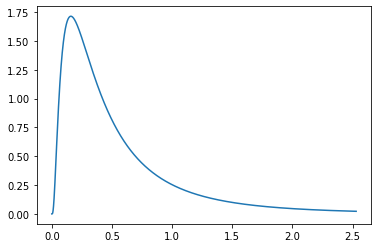

In [9]:
from scipy.stats import lognorm
#define x-axis values
x = np.linspace (0, max(data), 100000) 

forma2, localiz2, escala2 = lognorm.fit(data)

#calculate pdf of Gamma distribution for each x-value
y = lognorm.pdf(x, s = forma2, scale = escala2)

#create plot of Gamma distribution
plt.plot(x, y)

#display plot
plt.show()

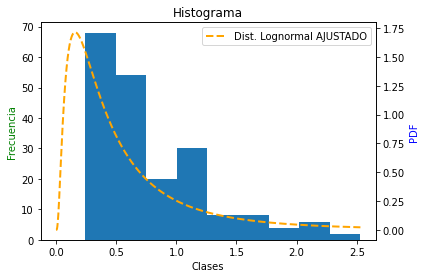

In [10]:
x = np.linspace (0, max(data), 100000) 
forma2, localiz2, escala2 = lognorm.fit(data) # Se utiliza la función para encontrar la forma y la escala, parametros de la distribucion

y = lognorm.pdf(x, s = forma2, scale = escala2)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(data, bins = 'sturges', label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Lognormal AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma")
ax2.legend(loc= 'upper right')
plt.show()

In [11]:
stats.kstest(data,'lognorm', args=(forma2, localiz2, escala2) )

KstestResult(statistic=0.1096171675938713, pvalue=0.015084684249815895)

Podemos observar que el valor de $p$ es menor a 0.05, por lo que no hay suficiente evidencia para aceptar $H_0$ y rechazar la $H_1$ que considera que al menos un dato proviene de otra distribucion que la especificada.

### Distribución Exponencial

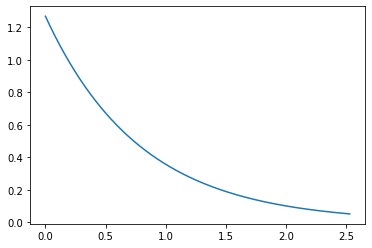

In [12]:
from scipy.stats import expon
#define x-axis values
x = np.linspace (0, max(data), 100000) 

localiz3, escala3 = expon.fit(data, floc=0)

#calculate pdf of Gamma distribution for each x-value
y = expon.pdf(x, loc = localiz3, scale = escala3)

#create plot of Gamma distribution
plt.plot(x, y)

#display plot
plt.show()

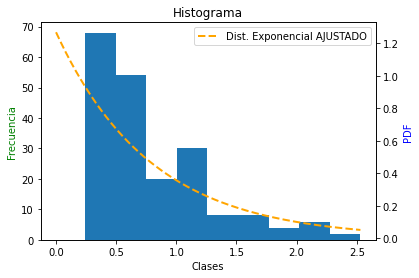

In [13]:
x = np.linspace (0, max(data), 100000) 
localiz3, escala3 = expon.fit(data, floc=0) # Se utiliza la función para encontrar la forma y la escala, parametros de la distribucion

y = expon.pdf(x, loc = localiz3, scale = escala3)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(data, bins = 'sturges', label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Exponencial AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma")
ax2.legend(loc= 'upper right')
plt.show()

In [14]:
stats.kstest(data,'expon', args=(localiz3, escala3) )

KstestResult(statistic=0.3014759063750713, pvalue=1.275199887665021e-16)

Podemos observar que el valor de $p$ es menor a 0.05, por lo que no hay suficiente evidencia para aceptar $H_0$ y rechazar la $H_1$ que considera que al menos un dato proviene de otra distribucion que la especificada.

### Distribución Weibull

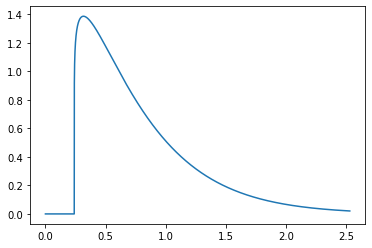

In [15]:
from scipy.stats import weibull_min
#define x-axis values
x = np.linspace (0, max(data), 100000) 

forma4, localiz4, escala4  = weibull_min.fit(data)

#calculate pdf of Gamma distribution for each x-value
y = weibull_min.pdf(x, c = forma4, loc = localiz4, scale = escala4)

#create plot of Gamma distribution
plt.plot(x, y)

#display plot
plt.show()

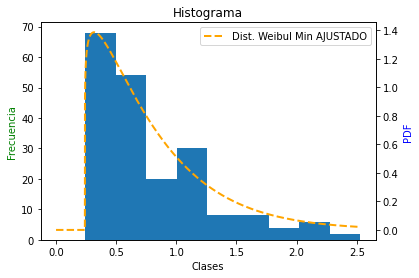

In [16]:
x = np.linspace (0, max(data), 100000) 
forma4, localiz4, escala4  = weibull_min.fit(data ) # Se utiliza la función para encontrar la forma y la escala, parametros de la distribucion

y = weibull_min.pdf(x, c = forma4, loc = localiz4, scale = escala4)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(data, bins = 'sturges', label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Weibul Min AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma")
ax2.legend(loc= 'upper right')
plt.show()

In [17]:
stats.kstest(data,'weibull_min', args = (forma4, localiz4, escala4) )

KstestResult(statistic=0.06752894789497538, pvalue=0.30746239225983163)

Podemos observar que el valor de $p$ es mayor a 0.05, por lo que hay suficiente evidencia para rechazar $H_1$ y aceptar la $H_0$ que considera que los datos proveienen de la distribucion especificada.

Recordemos que el análisis anterior fue realizado escogiendo estas distribuciones considerando algunos aspectos del material de ayuda que nos daba apoyo para discriminar cuales podrían ser los mejores ajustes para nuestros datos y visualmente nuestro histograma.

Para cada distribución primeramente se visualizó sola, luego sobrepuesta a nuestro primer histograma y luego se realizó una prueba Kolmogorov-Smirnov por medio SciPy.

El análisis realizados se divide en visual y en prueba de hipótesis, los resultados fueron los siguientes:

- Gamma: Visualmente se ajusta bien y el valor **p** es mayor a 0.05.
- Lognormal: Visualmente parece tener un buen ajuste, pero su valor de **p** es menor a 0.05.
- Exponencial: Visualmente tiene algun tipo de ajuste, pero su valor de **p** es muy por debajo de 0.05.
- Weibul Minimo: Visualmente tiene el mejor ajsute y su valor de **p** es mayor a 0.05.

Por lo tanto con este primer análisis se concluye:

- Que la distribución con mejor ajuste a nuestros datos es la de Weibull Minimo y luego Gamma.

Vamos a tomar 3 columnas cuantitativas más para realizar el mismo análisis.

In [18]:
# Para las 3 columnas adicionales se escogieron las siguientes: price, table y "x", cada una con una variable asignada para mejor manipulación del código.
price = df["price"]
table = df["table"]
x_col = df["x"]

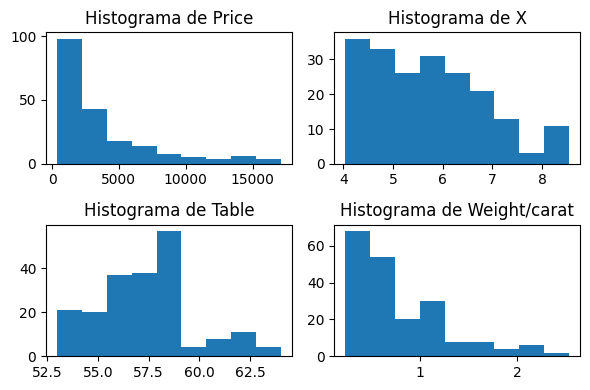

In [19]:
# Se grafican los histogramas de las 3 nuevas columnas además de la columna primeramente analizada carat que trae valores de una magnitud de peso.
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(price, bins = 'sturges', label = "Histograma")
axs[0, 0].set_title("Histograma de Price")

axs[1, 0].hist(table, bins = 'sturges', label = "Histograma")
axs[1, 0].set_title("Histograma de Table")

axs[0, 1].hist(x_col, bins = 'sturges', label = "Histograma")
axs[0, 1].set_title("Histograma de X")

axs[1, 1].hist(data, bins = 'sturges', label = "Histograma")
axs[1, 1].set_title("Histograma de Weight/carat")

fig.set_dpi(100)
fig.tight_layout()

Ahora se va realizar el análisis del ajuste de la distribución para cada histograma, toma en cuenta que los datos cumplen las mismas consideraciones que con la variable anteriormente análizada:

# Ajuste con Distribución Gamma

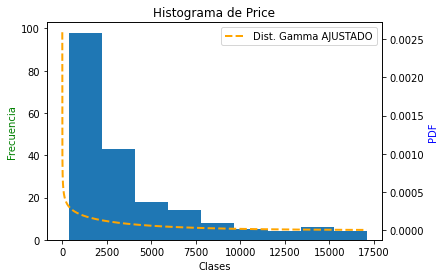

In [20]:
x = np.linspace (0, max(price), 100000) 
forma, localiz, escala = gamma.fit(price)

y = stats.gamma.pdf(x, a = forma, scale = escala)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(price, bins = 'sturges', label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Gamma AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma de Price")
ax2.legend(loc= 'upper right')
plt.show()

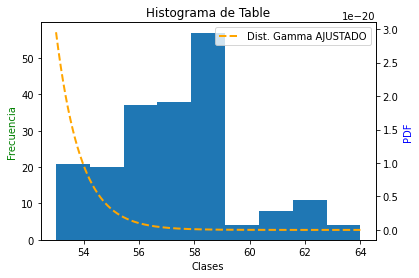

In [21]:
x = np.linspace (min(table), max(table), 100000) 
forma, localiz, escala = gamma.fit(table)

y = stats.gamma.pdf(x, a = forma, scale = escala)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(table, bins = 'sturges', label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Gamma AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma de Table")
ax2.legend(loc= 'upper right')
plt.show()

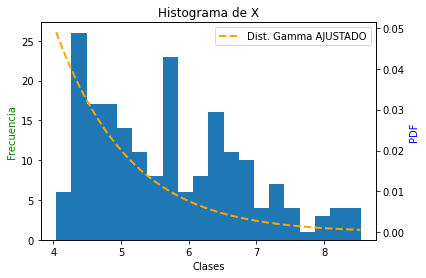

In [22]:
x = np.linspace (min(x_col), max(x_col), 100) 
forma, localiz, escala = gamma.fit(x_col)

y = stats.gamma.pdf(x, a = forma, scale = escala)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(x_col, bins = 20, label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Gamma AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma de X")
ax2.legend(loc= 'upper right')
plt.show()

Primeras impresiones:
- No se observa un ajuste de la linea pdf de la distribución Gamma con los histogramas.

# Ajuste con Distribución Lognormal

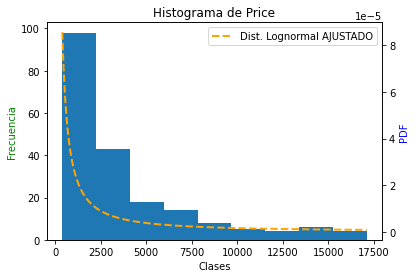

In [23]:
x = np.linspace (min(price), max(price), 100000) 
forma2, localiz2, escala2 = lognorm.fit(price) # Se utiliza la función para encontrar la forma y la escala, parametros de la distribucion

y = lognorm.pdf(x, s = forma2, scale = escala2)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(price, bins = 'sturges', label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Lognormal AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma de Price")
ax2.legend(loc= 'upper right')
plt.show()

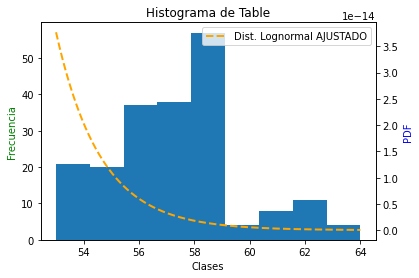

In [24]:
x = np.linspace (min(table), max(table), 100000) 
forma2, localiz2, escala2 = lognorm.fit(table) # Se utiliza la función para encontrar la forma y la escala, parametros de la distribucion

y = lognorm.pdf(x, s = forma2, scale = escala2)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(table, bins = 'sturges', label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Lognormal AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma de Table")
ax2.legend(loc= 'upper right')
plt.show()

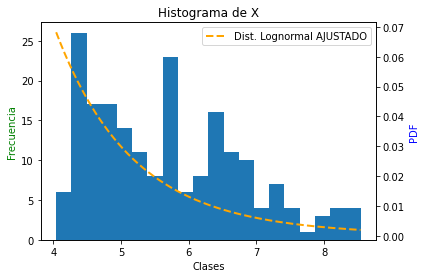

In [25]:
x = np.linspace (min(x_col), max(x_col), 100000) 
forma2, localiz2, escala2 = lognorm.fit(x_col) # Se utiliza la función para encontrar la forma y la escala, parametros de la distribucion

y = lognorm.pdf(x, s = forma2, scale = escala2)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(x_col, bins = 20, label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Lognormal AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma de X")
ax2.legend(loc= 'upper right')
plt.show()

Primeras impresiones:
- De todas las columnas se aprecia que podría ver un buen ajuste con la columna Price, sin embargo con las otras no se puede apreciar visualmente.

# Ajuste con Distribución Exponencial

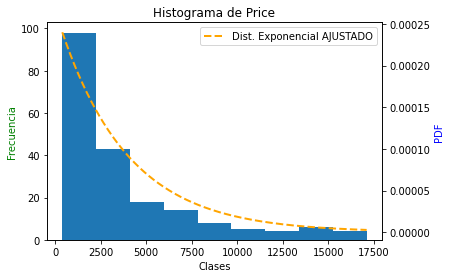

In [26]:
x = np.linspace (min(price), max(price), 100000) 
localiz3, escala3 = expon.fit(price, floc=0) # Se utiliza la función para encontrar la forma y la escala, parametros de la distribucion

y = expon.pdf(x, loc = localiz3, scale = escala3)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(price, bins = 'sturges', label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Exponencial AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma de Price")
ax2.legend(loc= 'upper right')
plt.show()

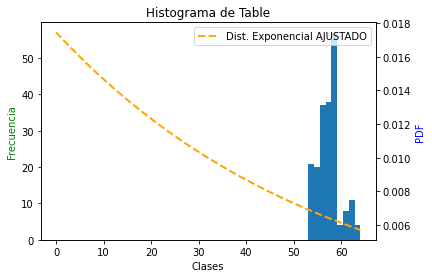

In [27]:
x = np.linspace (0, max(table), 100000) 
localiz3, escala3 = expon.fit(table, floc=0) # Se utiliza la función para encontrar la forma y la escala, parametros de la distribucion

y = expon.pdf(x, loc = localiz3, scale = escala3)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(table, bins = 'sturges', label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Exponencial AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma de Table")
ax2.legend(loc= 'upper right')
plt.show()

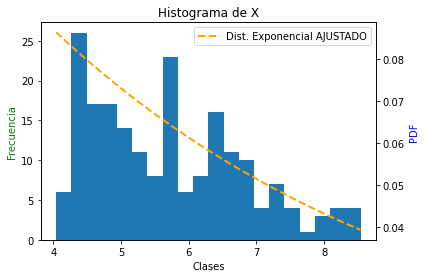

In [28]:
x = np.linspace (min(x_col), max(x_col), 100000) 
localiz3, escala3 = expon.fit(x_col, floc=0) # Se utiliza la función para encontrar la forma y la escala, parametros de la distribucion

y = expon.pdf(x, loc = localiz3, scale = escala3)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(x_col, bins = 20, label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Exponencial AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma de X")
ax2.legend(loc= 'upper right')
plt.show()

Primeras impresiones:
- De las 3 columnas, Price parece que tiene un buen ajuste visual, la columna de la medida de X podría tener un buen ajuste y la de Table no ajusta.

# Ajuste con Distribución Weibull Min

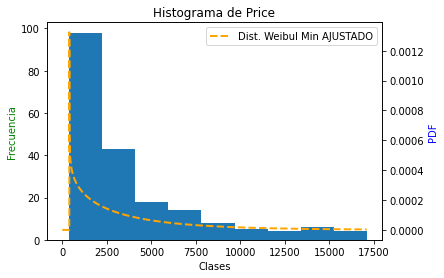

In [29]:
x = np.linspace (0, max(price), 100000) 
forma4, localiz4, escala4  = weibull_min.fit(price) # Se utiliza la función para encontrar la forma y la escala, parametros de la distribucion

y = weibull_min.pdf(x, c = forma4, loc = localiz4, scale = escala4)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(price, bins = 'sturges', label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Weibul Min AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma de Price")
ax2.legend(loc= 'upper right')
plt.show()

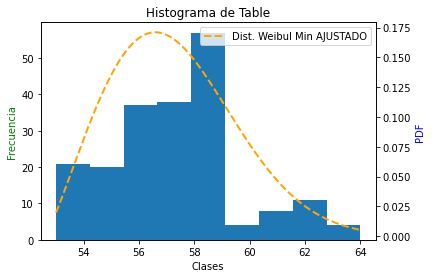

In [30]:
x = np.linspace (min(table), max(table), 100000) 
forma4, localiz4, escala4  = weibull_min.fit(table) # Se utiliza la función para encontrar la forma y la escala, parametros de la distribucion

y = weibull_min.pdf(x, c = forma4, loc = localiz4, scale = escala4)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(table, bins = 'sturges', label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Weibul Min AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma de Table")
ax2.legend(loc= 'upper right')
plt.show()

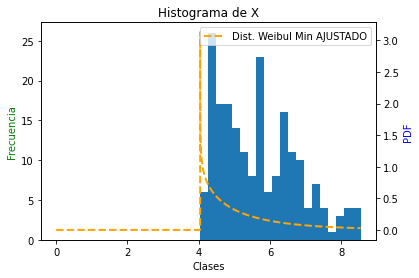

In [31]:
x = np.linspace (0, max(x_col), 100000) 
forma4, localiz4, escala4  = weibull_min.fit(x_col) # Se utiliza la función para encontrar la forma y la escala, parametros de la distribucion

y = weibull_min.pdf(x, c = forma4, loc = localiz4, scale = escala4)

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(x_col, bins = 20, label = "Histograma") # se modifica la cantidad de clases
ax2.plot(x, y, "orange", label = "Dist. Weibul Min AJUSTADO", linestyle = "dashed", linewidth=2)

ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color ='b')
plt.title("Histograma de X")
ax2.legend(loc= 'upper right')
plt.show()

Primeras impresiones:
- Con la distribución Weibull Minimo se observa un algún buen ajuste con la columna Price, sin embargo con Table trata pero no se termina de acomodar y con X no se aprecia ningún ajuste.

## Análisis de Columna Table

La columna Table se puede considerar que los datos se concentran en el centro y outliers en los extremos, por lo que se podría considerar las distribuciones: Normal y Logística.

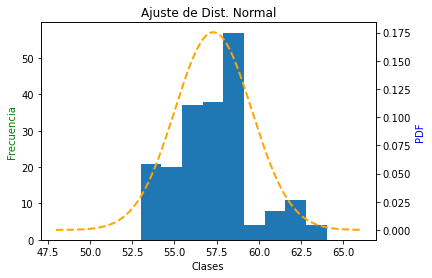

In [32]:
from scipy.stats import norm

x_values =  np.linspace(min(table)-5, max(table)+2, 1000)
parametros = norm.fit(table) 

pdf_ajustado = norm.pdf(x_values, loc = parametros[0],scale = parametros[1]) 

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(table, bins = 'sturges', label = "Histograma")
    
ax2.plot(x_values, pdf_ajustado,"orange", label="Dist. Normal AJUSTADO",linestyle="dashed", linewidth=2)
ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color='b')
plt.title("Ajuste de Dist. Normal")
plt.show()

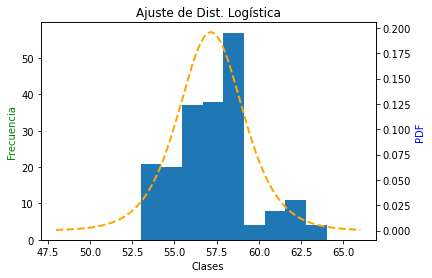

In [33]:
from scipy.stats import logistic

x_values =  np.linspace(min(table)-5, max(table)+2, 1000)
parametros = logistic.fit(table) 

pdf_ajustado = logistic.pdf(x_values, loc = parametros[0],scale = parametros[1]) 

fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.hist(table, bins = 'sturges', label = "Histograma")
    
ax2.plot(x_values, pdf_ajustado,"orange", label="Dist. Normal AJUSTADO",linestyle="dashed", linewidth=2)
ax1.set_xlabel('Clases')
ax1.set_ylabel('Frecuencia', color='g')
ax2.set_ylabel('PDF', color='b')
plt.title("Ajuste de Dist. Logística")
plt.show()

Primeras impresiones:
- Como se puede obseervar tanto para la distribución Normal como la Logística tienen visualmente un muy buen ajuste con la forma del histograma.

**Primer análisis para columna Carat/Weight**

Para el primer análisis retomamos los resultados de la prueba KS con un $\alpha=0.05$
- Que la distribución con mejor ajuste a nuestros datos es la de Weibull Minimo y luego Gamma.
- Tomando en cuenta los valores tanto del estadístico KS de D y P, se considera que el Weibull Mínimo tiene mejor ajuste que la Gamma.


**Análisis para las columnas Price, Table y X**

In [34]:
print("Distribución Gamma")
print("--------------------")
print("Columna Price")
print(stats.kstest(price,'gamma', args = gamma.fit(price) ))
print("--------------------")
print("Columna Table")
print(stats.kstest(table,'gamma', args = gamma.fit(table) ))
print("--------------------")
print("Columna X")
print(stats.kstest(x_col,'gamma', args = gamma.fit(x_col) ))

Distribución Gamma
--------------------
Columna Price
KstestResult(statistic=0.058368981698045386, pvalue=0.4853172012627641)
--------------------
Columna Table
KstestResult(statistic=0.10651142438095193, pvalue=0.01979388145849131)
--------------------
Columna X
KstestResult(statistic=0.08064283208320089, pvalue=0.14040778518810204)


**Conclusión:**
- Podemos observar que el valor de $p$ es mayor a 0.05 para las columnas **Price y X**, por lo que hay suficiente evidencia para aceptar $H_0$ y rechazar la $H_1$, por lo que consideramos que los datos provienen de la distribución propuesta.

- Podemos observar que el valor de $p$ es menor a 0.05 para la columna **Table**, por lo que no hay suficiente evidencia para aceptar $H_0$ y rechazar la $H_1$ que considera que al menos un dato proviene de otra distribucion que la especificada.

In [35]:
print("Distribución Lognormal")
print("--------------------")
print("Columna Price")
print(stats.kstest(price,'lognorm', args = lognorm.fit(price) ))
print("--------------------")
print("Columna Table")
print(stats.kstest(table,'lognorm', args = lognorm.fit(table) ))
print("--------------------")
print("Columna X")
print(stats.kstest(x_col,'lognorm', args = lognorm.fit(x_col) ))

Distribución Lognormal
--------------------
Columna Price
KstestResult(statistic=0.801705138579037, pvalue=4.264806558763438e-139)
--------------------
Columna Table
KstestResult(statistic=0.10315103866125216, pvalue=0.026325407024557768)
--------------------
Columna X
KstestResult(statistic=0.08647672864737699, pvalue=0.09464249744498143)


**Conclusión:**
- Podemos observar que el valor de $p$ es mayor a 0.05 para las columna **X**, por lo que hay suficiente evidencia para aceptar $H_0$ y rechazar la $H_1$, por lo que consideramos que los datos provienen de la distribución propuesta.
- Podemos observar que el valor de $p$ es menor a 0.05 para las columnas **Table y Price**, por lo que no hay suficiente evidencia para aceptar $H_0$ y rechazar la $H_1$ que considera que al menos un dato proviene de otra distribucion que la especificada.

- Visualmente pudimos apreciar que la distribución lognormal no ajustaba con los histogramas.

In [36]:
print("Distribución Exponencial")
print("--------------------")
print("Columna Price")
print(stats.kstest(price,'expon', args = expon.fit(price) ))
print("--------------------")
print("Columna Table")
print(stats.kstest(table,'expon', args = expon.fit(table) ))
print("--------------------")
print("Columna X")
print(stats.kstest(x_col,'expon', args = expon.fit(x_col) ))

Distribución Exponencial
--------------------
Columna Price
KstestResult(statistic=0.12167989361973505, pvalue=0.0048746381432837665)
--------------------
Columna Table
KstestResult(statistic=0.29737966803301563, pvalue=3.55458504386653e-16)
--------------------
Columna X
KstestResult(statistic=0.12281725045339897, pvalue=0.0043554287261305304)


**Conclusión:**
- Podemos observar que el valor de $p$ es menor a 0.05 para todas las columnas, por lo que no hay suficiente evidencia para aceptar $H_0$ y rechazar la $H_1$ que considera que al menos un dato proviene de otra distribucion que la especificada.

- Visualmente pudimos apreciar que la distribución exponencial no ajustaba del todo con las columnas price y el resto en nada.

In [37]:
print("Distribución Weibull Mínimo")
print("--------------------")
print("Columna Price")
print(stats.kstest(price,'weibull_min', args = weibull_min.fit(price)))
print("--------------------")
print("Columna Table")
print(stats.kstest(table,'weibull_min', args = weibull_min.fit(table)))
print("--------------------")
print("Columna X")
print(stats.kstest(x_col,'weibull_min', args = weibull_min.fit(x_col)))

Distribución Weibull Mínimo
--------------------
Columna Price
KstestResult(statistic=0.06382493066591596, pvalue=0.37340230570529165)
--------------------
Columna Table
KstestResult(statistic=0.11219744213787355, pvalue=0.01196513934895142)
--------------------
Columna X
KstestResult(statistic=0.24295100007819936, pvalue=7.056261920016263e-11)


**Conclusión:**
- Podemos observar que el valor de $p$ es mayor a 0.05 para las columnas **Price**, por lo que hay suficiente evidencia para aceptar $H_0$ y rechazar la $H_1$, por lo que consideramos que los datos provienen de la distribución propuesta.

- Podemos observar que el valor de $p$ es menor a 0.05 para la columna **Table y X**, por lo que no hay suficiente evidencia para aceptar $H_0$ y rechazar la $H_1$ que considera que al menos un dato proviene de otra distribucion que la especificada.

In [38]:
print("Distribución Normal")
print("--------------------")
print("Columna Price")
print(stats.kstest(price,'norm', args = norm.fit(price)))
print("--------------------")
print("Columna Table")
print(stats.kstest(table,'norm', args = norm.fit(table)))
print("--------------------")
print("Columna X")
print(stats.kstest(x_col,'norm', args = norm.fit(x_col)))

Distribución Normal
--------------------
Columna Price
KstestResult(statistic=0.19315431597636823, pvalue=5.198049669403784e-07)
--------------------
Columna Table
KstestResult(statistic=0.1321887999587364, pvalue=0.0016540653778222192)
--------------------
Columna X
KstestResult(statistic=0.10046246823386612, pvalue=0.03285429127965578)


In [39]:
print("Distribución Logística")
print("--------------------")
print("Columna Price")
print(stats.kstest(price,'logistic', args = logistic.fit(price)))
print("--------------------")
print("Columna Table")
print(stats.kstest(table,'logistic', args = logistic.fit(table)))
print("--------------------")
print("Columna X")
print(stats.kstest(x_col,'logistic', args = logistic.fit(x_col)))

Distribución Logística
--------------------
Columna Price
KstestResult(statistic=0.20380075349885707, pvalue=9.248166257513538e-08)
--------------------
Columna Table
KstestResult(statistic=0.1107181381351871, pvalue=0.013673854676576485)
--------------------
Columna X
KstestResult(statistic=0.09169239670156777, pvalue=0.06497895982006985)


**Conclusión:**
- Podemos observar que el valor de $p$ es mayor a 0.05 para las columnas **X**, por lo que hay suficiente evidencia para aceptar $H_0$ y rechazar la $H_1$, por lo que consideramos que los datos provienen de la distribución propuesta.
- Podemos observar que el valor de $p$ es menor a 0.05 para la columna **Table y Price**, por lo que no hay suficiente evidencia para aceptar $H_0$ y rechazar la $H_1$ que considera que al menos un dato proviene de otra distribucion que la especificada.

### Conclusión Final:

- La columna Price se ajusta con las distribuciones Gamma y Weibull mínimo, pero teniendo el estadístico KS de D más bajo y el valor de P más alto con la distribución Gamma.
- La columna X se ajusta con las distribuciones Gamma, Lognormal y Logística, pero teniendo el estadístico KS de D más bajo y el valor de P más alto con la distribución Gamma.
- La columna Table no se ajustó a las distribuciones porpuestas con asimetría como el resto de columnas y con simetría tomando en cuenta la forma de su histograma.